C:\Users\matia\AppData\Local\Temp\ipykernel_11776\3831445140.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)


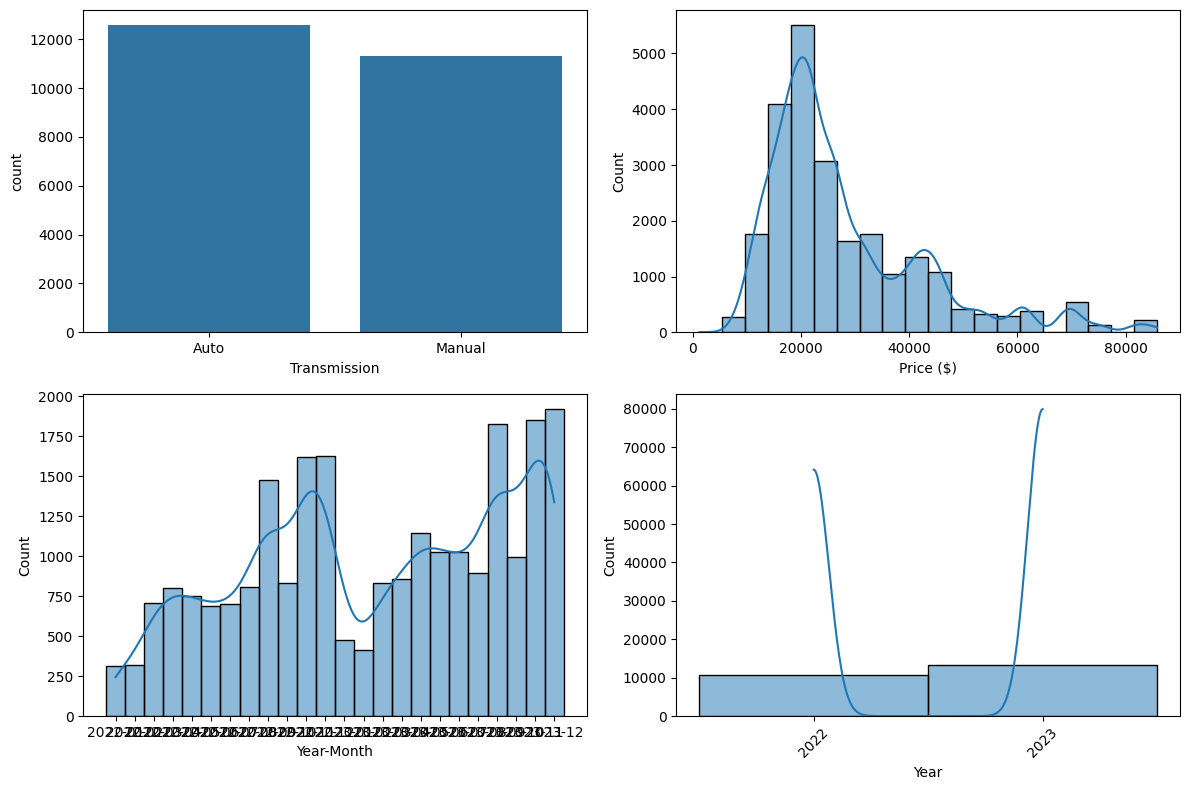

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/car_sales.csv")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Date is in datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Aggregate by month or year for better visualization
df["Year-Month"] = df["Date"].dt.to_period("M")  # Group by Month
df["Year"] = df["Date"].dt.year  # Group by Year (Alternative)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(x=df["Transmission"], ax=axes[0, 0])
sns.histplot(df["Price ($)"], bins=20, kde=True, ax=axes[0, 1])

# Fixing the Date histogram by grouping by month
sns.histplot(df["Year-Month"].astype(str), bins=20, kde=True, ax=axes[1, 0])
sns.histplot(df["Year"].astype(str), bins=20, ax=axes[1, 1])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


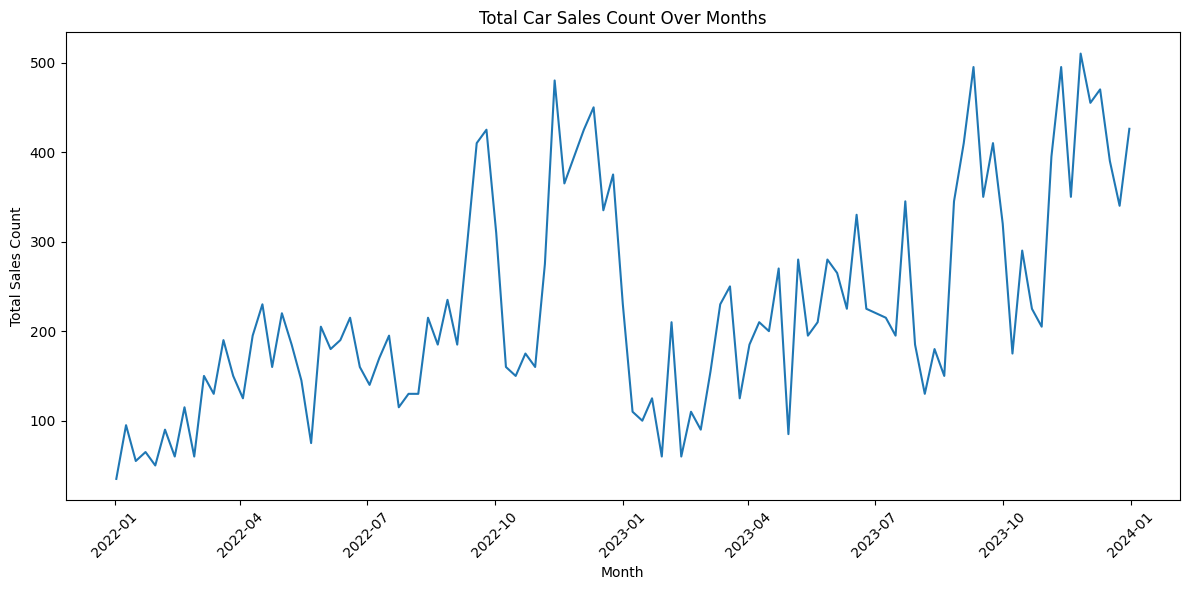

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = './data/car_sales.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to a datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Group the data by Date to count the total number of sales for all brands on each date
total_sales_count = data.groupby('Date').size().reset_index(name='Total Sales Count')

# Resample the data to group it by month
total_sales_count.set_index('Date', inplace=True)
monthly_sales = total_sales_count.resample('W').sum()

# Plot total sales count over months
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Total Sales Count'], label='Total Sales')

plt.title('Total Car Sales Count Over Months')
plt.xlabel('Month')
plt.ylabel('Total Sales Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\matia\AppData\Local\Temp\ipykernel_11776\2878837442.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[col_x], y=df[col_y], palette="deep")


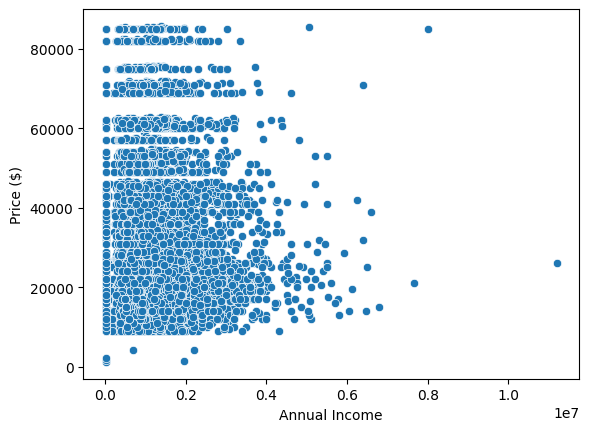

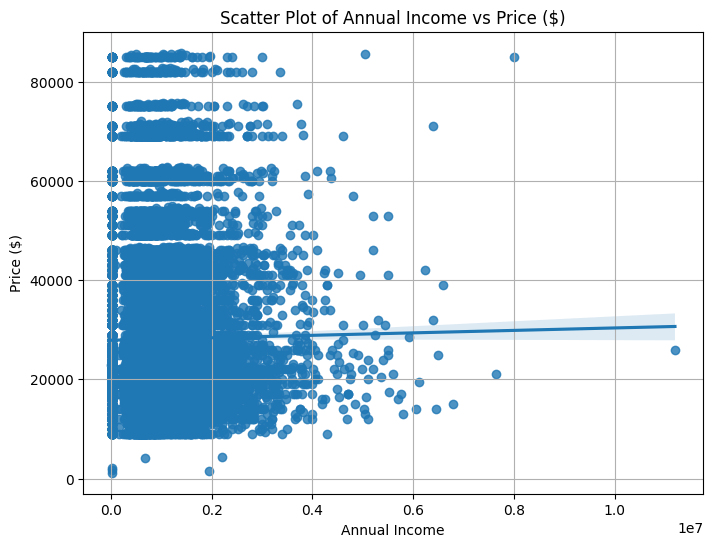

In [25]:


# Define the two columns to plot
col_x = 'Annual Income'
col_y = 'Price ($)'

sns.scatterplot(x=df[col_x], y=df[col_y], palette="deep")

# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(x=df[col_x], y=df[col_y])

# Titles and labels
plt.title(f'Scatter Plot of {col_x} vs {col_y}')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.grid(True)

# Show plot
plt.show()


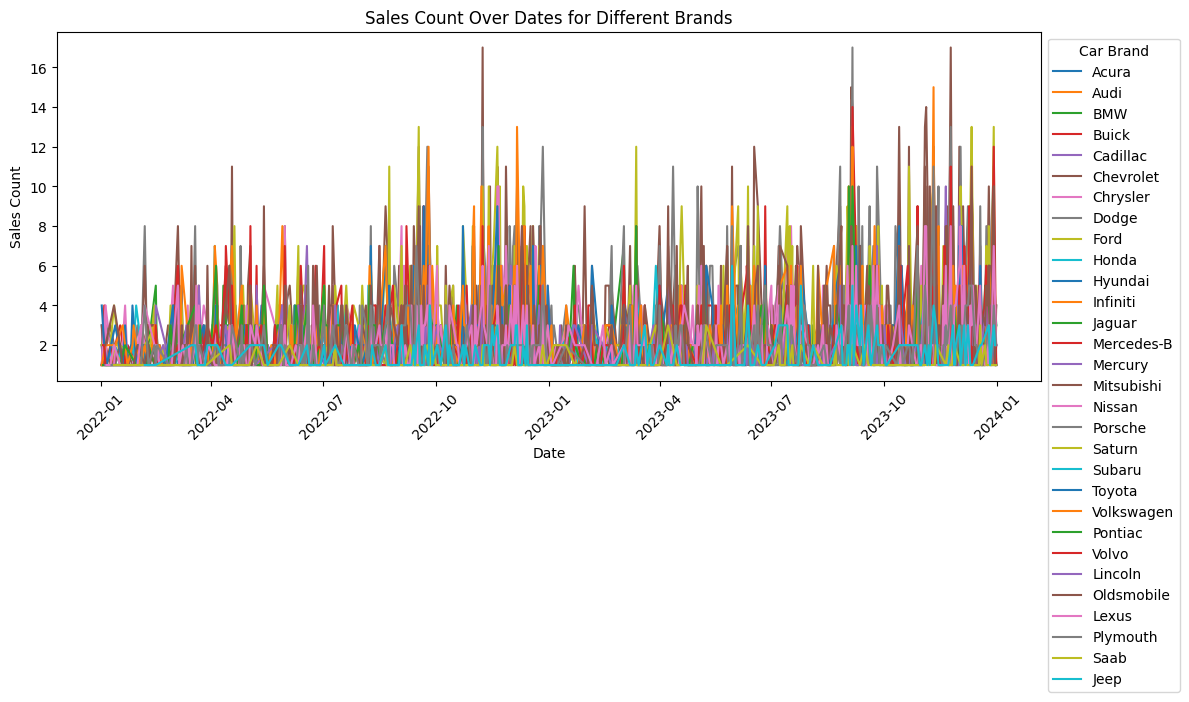

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = './data/car_sales.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to a datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Group the data by Date and Company to count the number of sales for each brand on each date
sales_count = data.groupby(['Date', 'Company']).size().reset_index(name='Sales Count')

# Plot sales count over dates for different brands
plt.figure(figsize=(12, 6))
for brand in sales_count['Company'].unique():
    brand_sales = sales_count[sales_count['Company'] == brand]
    plt.plot(brand_sales['Date'], brand_sales['Sales Count'], label=brand)

plt.title('Sales Count Over Dates for Different Brands')
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.legend(title='Car Brand', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\matia\AppData\Local\Temp\ipykernel_11776\3755459634.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = brand_sales.resample('M').size()


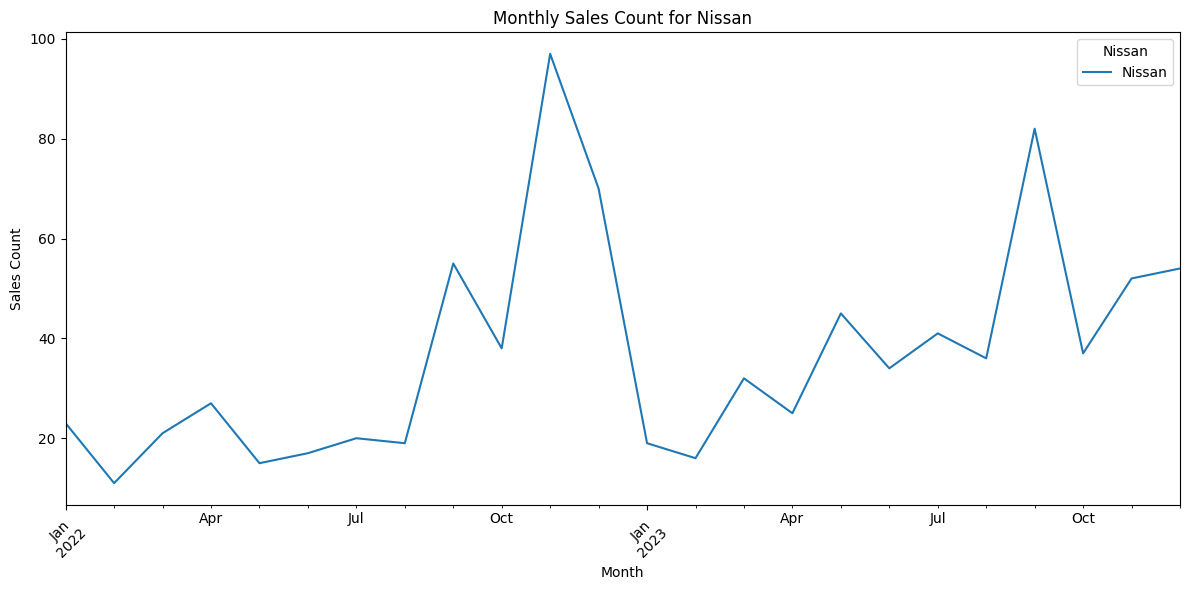

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = './data/car_sales.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to a datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Specify the brand you want to visualize (replace 'BrandName' with your desired brand)
brand_name = 'Nissan'  # Example brand, change as needed

# Filter the data for the specified brand
brand_sales = data[data['Company'] == brand_name]

# Resample the data by month and count sales
brand_sales.set_index('Date', inplace=True)
monthly_sales = brand_sales.resample('M').size()

# Plot sales count for the selected brand with monthly bins
plt.figure(figsize=(12, 6))
monthly_sales.plot(label=brand_name)

plt.title(f'Monthly Sales Count for {brand_name}')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.legend(title=f'{brand_name}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\matia\AppData\Local\Temp\ipykernel_18032\4130522652.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = brand_sales.resample('M').size()


ADF Statistic: -3.0096174685698474
p-value: 0.03400595888915539


C:\Users\matia\AppData\Local\Temp\ipykernel_18032\4130522652.py:43: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=forecast_steps + 1, freq='M')[1:], forecast, label='Forecast', color='red')


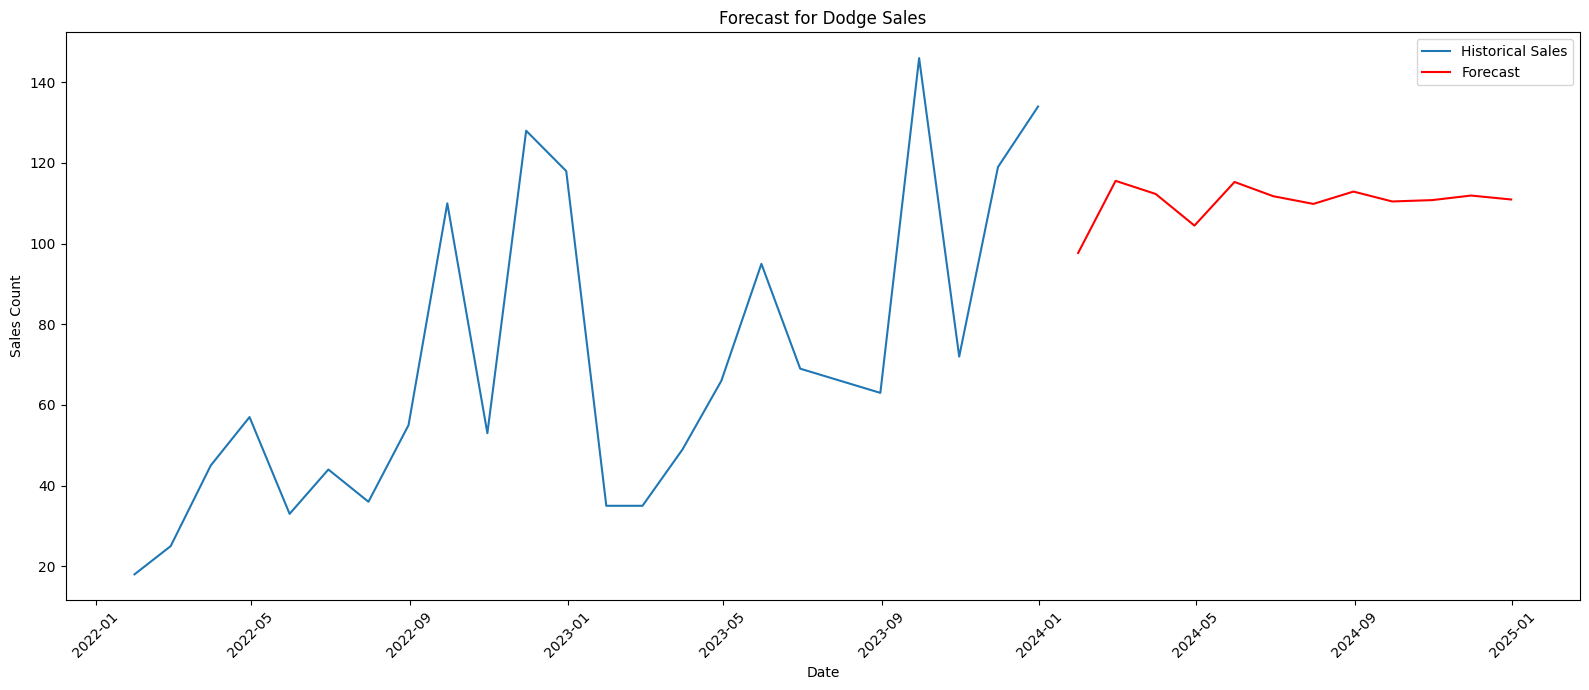

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller

# Load and prepare the dataset
file_path = './data/car_sales.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to a datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Specify the brand for which you want to make the forecast
brand_name = 'Dodge'  # Example brand, change as needed

# Filter the data for the selected brand
brand_sales = data[data['Company'] == brand_name]

# Set the date column as the index
brand_sales.set_index('Date', inplace=True)

# Resample by month and get the sales count
monthly_sales = brand_sales.resample('M').size()

# Check for stationarity: Augmented Dickey-Fuller Test (ADF Test)
adf_result = adfuller(monthly_sales)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# If the p-value > 0.05, the data is non-stationary and needs differencing

# ARIMA Model (adjust p, d, q parameters)
model = ARIMA(monthly_sales, order=(5,1,0))  # p=5, d=1, q=0 for example
model_fit = model.fit()

forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(16, 7))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=forecast_steps + 1, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title(f'Forecast for {brand_name} Sales')
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\matia\AppData\Local\Temp\ipykernel_18032\1598954827.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_sales = data.resample('M').size()
c:\Users\matia\Prosjekter\sales_predictions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ADF Statistic: -2.73630143067017
p-value: 0.06796441915351661


c:\Users\matia\Prosjekter\sales_predictions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\matia\AppData\Local\Temp\ipykernel_18032\1598954827.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(total_sales.index[-1], periods=forecast_steps + 1, freq='M')[1:]


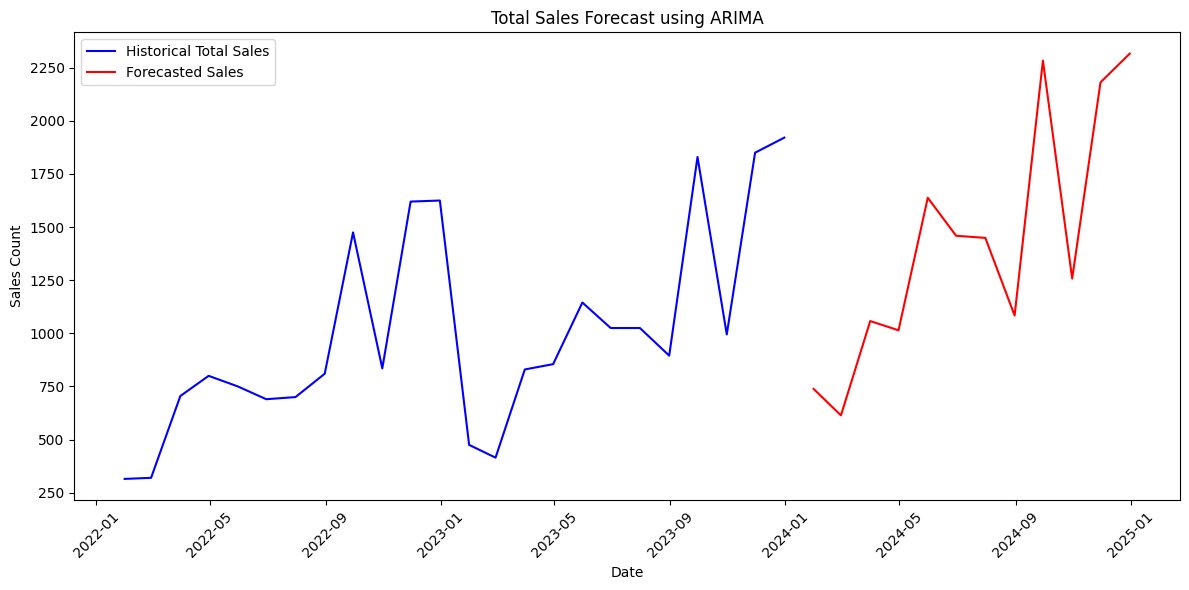

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load and prepare the dataset
file_path = './data/car_sales.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to a datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Set the date column as the index
data.set_index('Date', inplace=True)

# Resample by month and get the total sales count across all brands
total_sales = data.resample('M').size()

# Check for stationarity: Augmented Dickey-Fuller Test (ADF Test)
adf_result = adfuller(total_sales)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# If the p-value > 0.05, the data is non-stationary and needs differencing

# ARIMA Model (adjust p, d, q parameters)
model = ARIMA(total_sales, order=(4,1,0), seasonal_order=(1, 1, 1, 12))  # p=5, d=1, q=0 for example
model_fit = model.fit()

# Forecast the next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))

# Plot historical total sales
plt.plot(total_sales, label='Historical Total Sales', color='blue')

# Generate future dates for the forecasted period
forecast_dates = pd.date_range(total_sales.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Plot forecasted sales
plt.plot(forecast_dates, forecast, label='Forecasted Sales', color='red')

# Titles and labels
plt.title('Total Sales Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
